![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.describe()

,id,target
count,5.414620e+05,541462.000000
mean,3.740578e+06,0.102991
std,2.444232e+06,0.196979
min,5.985200e+04,0.000000
25%,7.977440e+05,0.000000
50%,5.222921e+06,0.000000
75%,5.770195e+06,0.166667
max,6.333982e+06,1.000000


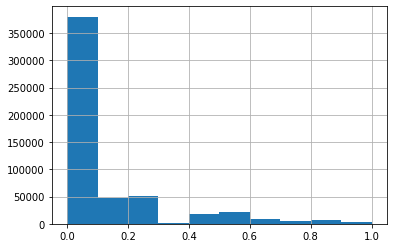

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
vector_A = CountVectorizer(lowercase=False)
X_dtm_train_A = vector_A.fit_transform(X_train)
X_dtm_test_A = vector_A.transform(X_test)

In [10]:
# Celda 1
xgb_model_A = XGBRegressor(seed = 20)
#xgb_model_A = RandomForestRegressor()
xgb_model_A.fit(X_dtm_train_A, y_train)
y_pred_A = xgb_model_A.predict(X_dtm_test_A)

[22:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
mse_xgb_model_A = metrics.mean_squared_error(y_test, y_pred_A)
mse_xgb_model_A

0.02805552358953238

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2
vector_B = CountVectorizer(lowercase=False, ngram_range=(3, 3))
X_dtm_train_B = vector_B.fit_transform(X_train)
X_dtm_test_B = vector_B.transform(X_test)

In [13]:
xgb_model_B = XGBRegressor(seed = 20)
xgb_model_B.fit(X_dtm_train_B, y_train)
y_pred_B = xgb_model_B.predict(X_dtm_test_B)

[22:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
mse_xgb_model_B = metrics.mean_squared_error(y_test, y_pred_B)
mse_xgb_model_B

0.038139829411688655

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3

Tfidf son las siglas en inglés de "Term Frequency - Inverse Document Frequency", es un algoritmo que permite calcular como una medida numérica, la relevancia de una palabra en una serie de texto. Su valor aumenta proporcionalmente al número de veces que una palabra aparece en un documento, pero se compensa por la frecuencia de palabras que aparece en el conjunto de datos total, lo que permite darle manejo al hecho de que algunas palabras son más comunes que otras.

Tf-idf es una de las mejores métricas para determinar qué tan significativo es un término para un texto en una serie de textos. Tf-idf es un sistema que asigna una ponderación a cada palabra en un documento, en función de su frecuencia de término(tf) y la frecuencia de documento recíproca(tf)(idf). Las palabras con puntuaciones de peso más altas se consideran más significativas. 

Ventajas:

La ventaja sobre CountVectorizer es que este solo cuenta el número de veces que aparece una palabra en un documento, lo que da como resultado un sesgo a favor de las palabras más frecuentes, lo que termina ignorando palabras raras que podrían haber ayudado a procesar los datos de manera más eficiente.
TfidfVectorizer pondera el número de palabras según la frecuencia con la que aparecen en todos los documentos.

Desventajas:

Calcula la significancia directamente en el espacio de conteo de palabras, lo que puede ser un proceso lento para unos conjuntos de vocabularios grandes.



## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 4

tfidfvectorizer = TfidfVectorizer(lowercase=False)
X_dtm_train_C = tfidfvectorizer.fit_transform(X_train)
X_dtm_test_C = tfidfvectorizer.transform(X_test)

In [16]:
xgb_model_C = XGBRegressor(seed = 20)
xgb_model_C.fit(X_dtm_train_C, y_train)
y_pred_C = xgb_model_C.predict(X_dtm_test_C)

[23:06:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
mse_xgb_model_C = metrics.mean_squared_error(y_test, y_pred_C)
mse_xgb_model_C

0.027892155538842965

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

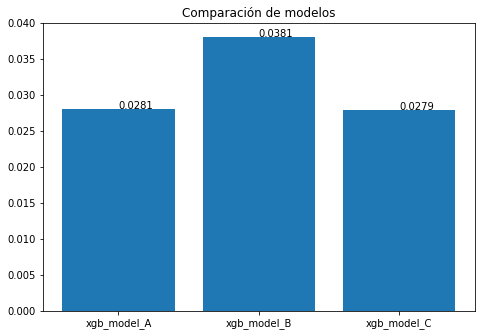

In [23]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['xgb_model_A', 'xgb_model_B', 'xgb_model_C']
ejeY = [round(mse_xgb_model_A, 4), 
        round(mse_xgb_model_B, 4), 
        round(mse_xgb_model_C, 4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Los datos de texto requieren una preparación especial antes de puedan ser utilizados en un modelado predictivo. El texto debe ser analizado para eliminar palabras y después deben codificarse como números enteros o valores de coma flotante para su uso como entrada en un modelo de Machine Learning. Como podemos observar el modelo con el mejor desempeño en este sentido es el tfidVectorizer con un MSE de 0.0279, que como vimos tiene en cuenta palabras no tan comunes y presenta una ligera mayor eficiencia que el modelo con CountVectorizer. 